In [1]:
import pandas as pd
data = pd.read_csv('Prob-Sentiment_tweet.csv', sep = ',')
data.head()

,Sentiment,Text
0,0,@artusof its a pain. There is a known issue as...
1,1,@artvisions rainy Sunday mornings are perfect....
2,1,@artyjill I used to sell my prints but have be...
3,1,@artykel so whats new with you? Any cool ideas...
4,0,@AmandaSue123 forealll me too.


In [2]:
text = data['Text']
class_label = data['Sentiment']

In [3]:
class_label

0       0
1       1
2       1
3       1
4       0
       ..
4995    0
4996    1
4997    0
4998    1
4999    1
Name: Sentiment, Length: 5000, dtype: int64

In [4]:
class_label.value_counts()

1    2883
0    2117
Name: Sentiment, dtype: int64

In [5]:
import numpy as np
from keras.utils.np_utils import to_categorical
label_1 = np.asarray(class_label)
label = to_categorical(np.asarray(label_1))

Using TensorFlow backend.


In [6]:
label

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [7]:
from keras.preprocessing.text import Tokenizer
tk=Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True, split=" ")
tk.fit_on_texts(text)
index=tk.word_index
print(index)

{'i': 1, 'you': 2, 'to': 3, 'the': 4, 'a': 5, 'it': 6, 'and': 7, 'my': 8, 'in': 9, 'for': 10, 'that': 11, 'is': 12, 'me': 13, 'of': 14, 'have': 15, 'so': 16, 'but': 17, 'on': 18, "i'm": 19, 'be': 20, 'was': 21, 'your': 22, 'just': 23, 'not': 24, 'u': 25, 'are': 26, 'like': 27, 'too': 28, 'good': 29, 'no': 30, 'get': 31, 'at': 32, 'lol': 33, 'with': 34, 'know': 35, 'thanks': 36, 'love': 37, "it's": 38, 'all': 39, 'do': 40, 'quot': 41, 'out': 42, 'now': 43, 'up': 44, 'this': 45, 'we': 46, 'what': 47, 'if': 48, 'will': 49, 'there': 50, 'see': 51, 'one': 52, "don't": 53, 'go': 54, 'can': 55, 'well': 56, 'hope': 57, 'from': 58, 'sorry': 59, 'day': 60, 'really': 61, 'amp': 62, 'about': 63, 'haha': 64, 'time': 65, 'going': 66, 'they': 67, 'am': 68, 'oh': 69, 'as': 70, 'got': 71, 'think': 72, 'im': 73, 'how': 74, 'when': 75, 'here': 76, 'some': 77, 'yeah': 78, 'did': 79, 'http': 80, 'much': 81, 'would': 82, 'been': 83, 'had': 84, 'want': 85, "that's": 86, 'still': 87, "can't": 88, 'its': 89, '

In [8]:
x = tk.texts_to_sequences(text)
print (x)

[[3988, 89, 5, 603, 50, 12, 5, 1701, 986, 70, 89, 987, 10, 39, 1702, 3989], [3990, 1703, 389, 1704, 26, 576, 225, 22, 65, 1134], [3991, 1, 390, 3, 1354, 8, 3992, 17, 15, 83, 301, 10, 377, 3, 1135, 8, 97, 16, 1, 55, 31, 108, 65, 18, 8, 750], [3993, 16, 687, 141, 34, 2, 190, 151, 1355, 7, 75, 26, 46, 1136, 31, 44, 10, 423], [3994, 3995, 13, 28], [3996, 64, 24, 604, 1, 85, 3, 31, 5, 1705, 14, 3997, 1706, 87], [3998, 23, 1707, 2], [3999, 391, 1, 68, 1137, 59, 1, 248, 22, 988, 1, 68, 112, 4000, 80, 1356, 13, 4001], [4002, 313, 1, 40, 27, 4003, 8, 989, 4004, 61, 4, 751, 875, 16, 128, 990, 4, 218, 49, 118, 519, 19, 136, 209, 11], [4005, 19, 302, 18, 6, 36, 10, 4, 2379], [4006, 29, 202], [4007, 458, 1, 49, 64], [1708, 100, 5, 4008], [1708, 1, 182, 1357, 54, 39, 2380, 7, 27, 2381, 991, 7, 876, 17, 6, 23, 1709, 7, 4009, 7, 1, 21, 27, 321, 175], [1708, 47, 164, 40, 46, 54, 93, 18, 688, 4010, 2, 28], [4011, 48, 45, 499, 47, 1, 72, 6, 499, 109, 29, 202, 226, 13, 48, 2, 95, 268, 64, 37, 2, 4012], [4

In [9]:
vocab_size = len(index)
word_index = tk.word_index
print(vocab_size+1)

11911


In [10]:
index

{'i': 1,
 'you': 2,
 'to': 3,
 'the': 4,
 'a': 5,
 'it': 6,
 'and': 7,
 'my': 8,
 'in': 9,
 'for': 10,
 'that': 11,
 'is': 12,
 'me': 13,
 'of': 14,
 'have': 15,
 'so': 16,
 'but': 17,
 'on': 18,
 "i'm": 19,
 'be': 20,
 'was': 21,
 'your': 22,
 'just': 23,
 'not': 24,
 'u': 25,
 'are': 26,
 'like': 27,
 'too': 28,
 'good': 29,
 'no': 30,
 'get': 31,
 'at': 32,
 'lol': 33,
 'with': 34,
 'know': 35,
 'thanks': 36,
 'love': 37,
 "it's": 38,
 'all': 39,
 'do': 40,
 'quot': 41,
 'out': 42,
 'now': 43,
 'up': 44,
 'this': 45,
 'we': 46,
 'what': 47,
 'if': 48,
 'will': 49,
 'there': 50,
 'see': 51,
 'one': 52,
 "don't": 53,
 'go': 54,
 'can': 55,
 'well': 56,
 'hope': 57,
 'from': 58,
 'sorry': 59,
 'day': 60,
 'really': 61,
 'amp': 62,
 'about': 63,
 'haha': 64,
 'time': 65,
 'going': 66,
 'they': 67,
 'am': 68,
 'oh': 69,
 'as': 70,
 'got': 71,
 'think': 72,
 'im': 73,
 'how': 74,
 'when': 75,
 'here': 76,
 'some': 77,
 'yeah': 78,
 'did': 79,
 'http': 80,
 'much': 81,
 'would': 82,
 'been

In [11]:
x[0]

[3988, 89, 5, 603, 50, 12, 5, 1701, 986, 70, 89, 987, 10, 39, 1702, 3989]

In [12]:
text[0]

'@artusof its a pain. There is a known issue as its happening for all source parameters'

In [13]:
from keras.preprocessing.sequence import pad_sequences
embedding_vector_length =32
padded_docs = pad_sequences(x, maxlen=embedding_vector_length, padding='post')
print (padded_docs)

[[ 3988    89     5 ...     0     0     0]
 [ 3990  1703   389 ...     0     0     0]
 [ 3991     1   390 ...     0     0     0]
 ...
 [  808    80   139 ...     0     0     0]
 [  808    80   139 ...     0     0     0]
 [  808     1 11910 ...     0     0     0]]


In [14]:
padded_docs[0]

array([3988,   89,    5,  603,   50,   12,    5, 1701,  986,   70,   89,
        987,   10,   39, 1702, 3989,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [15]:
#Looading the pre-trained embedding layer i.e, "GloVe, Pre-trained word vectors from Twitter"
embeddings_index = {}
f = open('glove.twitter.27B.25d.txt', encoding="utf8")
for line in f:
    #splitting the each value in a line with space
    values = line.split()
    
    #storing the first value i.e, an english word
    word = values[0] 
    
     #converting all splitted the values from first to last(expect first word) into an array
    coefs = np.asarray(values[1:], dtype='float32')
    
    #converting word into array of numerical values
    embeddings_index[word] = coefs 
f.close()
print('Total %s word vectors in Glove 6B 100d.' % len(embeddings_index))

Total 1193514 word vectors in Glove 6B 100d.


In [16]:
# Initialize the weight for each word for the embedding layer. 
# Words not present in the dictionary will be initialized by a random value 
embedding_dim = 25
embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))

for word, i in word_index.items(): # Selecting word from our tweet unique words list for changing with the values from glove
    embedding_vector = embeddings_index.get(word) # Finding our tweet words in glove and taking its array 
    if embedding_vector is not None: 
#words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, label, test_size=0.30, random_state=42)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Embedding(input_dim = vocab_size + 1, output_dim = 25, weights=[embedding_matrix], input_length=embedding_vector_length, trainable=False))
model.add(Conv1D(filters = 128,kernel_size=3, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 25)            297775    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 128)           9728      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               393728    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

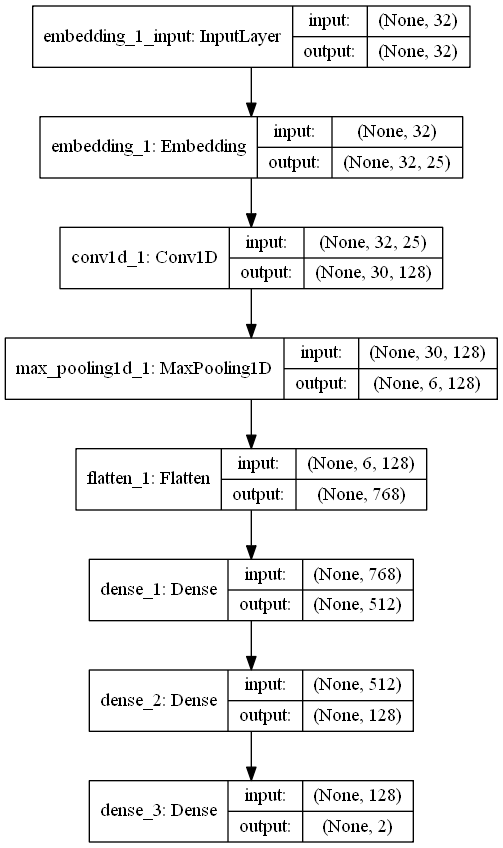

In [19]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
model.fit(X_train, y_train, validation_data = (X_test, y_test),
          epochs=50,batch_size=10, verbose=2)

Train on 3500 samples, validate on 1500 samples
Epoch 1/50
 - 3s - loss: 0.6637 - accuracy: 0.6083 - val_loss: 0.6124 - val_accuracy: 0.6393
Epoch 2/50
 - 2s - loss: 0.5670 - accuracy: 0.6886 - val_loss: 0.5812 - val_accuracy: 0.6807
Epoch 3/50
 - 2s - loss: 0.5208 - accuracy: 0.7323 - val_loss: 0.5722 - val_accuracy: 0.6927
Epoch 4/50
 - 2s - loss: 0.4504 - accuracy: 0.7826 - val_loss: 0.6515 - val_accuracy: 0.6880
Epoch 5/50
 - 2s - loss: 0.3733 - accuracy: 0.8229 - val_loss: 0.7259 - val_accuracy: 0.6727
Epoch 6/50
 - 2s - loss: 0.2939 - accuracy: 0.8706 - val_loss: 0.9124 - val_accuracy: 0.6807
Epoch 7/50
 - 2s - loss: 0.2254 - accuracy: 0.9049 - val_loss: 1.0131 - val_accuracy: 0.6573
Epoch 8/50
 - 2s - loss: 0.1700 - accuracy: 0.9311 - val_loss: 1.1092 - val_accuracy: 0.6700
Epoch 9/50
 - 2s - loss: 0.1137 - accuracy: 0.9577 - val_loss: 1.2019 - val_accuracy: 0.6773
Epoch 10/50
 - 2s - loss: 0.0856 - accuracy: 0.9671 - val_loss: 1.3632 - val_accuracy: 0.6587
Epoch 11/50
 - 2s - l

In [21]:
predictions_test = model.predict(X_test)
predictions_test_1 = np.zeros_like(predictions_test)
predictions_test_1[np.arange(len(predictions_test)), predictions_test.argmax(1)] = 1

In [22]:
predictions_test

array([[2.0673301e-02, 9.7932673e-01],
       [9.9961299e-01, 3.8701834e-04],
       [6.7368106e-08, 9.9999988e-01],
       ...,
       [9.9981731e-01, 1.8266751e-04],
       [5.1648903e-01, 4.8351097e-01],
       [9.9036741e-01, 9.6325688e-03]], dtype=float32)

In [23]:
predictions_test_1

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_test_1))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       620
           1       0.73      0.69      0.70       880

   micro avg       0.66      0.66      0.66      1500
   macro avg       0.66      0.66      0.66      1500
weighted avg       0.67      0.66      0.66      1500
 samples avg       0.66      0.66      0.66      1500



In [25]:
from sklearn.metrics import accuracy_score
print( accuracy_score(y_test,predictions_test_1))

0.6633333333333333
